In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imageai.Classification.Custom import CustomImageClassification
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from tqdm import tqdm

/Users/florianberthelot/.pyenv/versions/3.11.3/envs/projet-e2/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/florianberthelot/.pyenv/versions/3.11.3/envs/projet-e2/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/Users/florianberthelot/.pyenv/versions/3.11.3/envs/projet-e2/lib/python3.11/site-packages/torchvision/models/inception.py:43: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings

In [2]:
# Initialisation
classifier = CustomImageClassification()
classifier.setModelTypeAsDenseNet121()
classifier.setModelPath("modele.pt")
classifier.setJsonPath("archive_model_classes.json")
classifier.loadModel()

# Chargement des Données de Test
test_data_path = 'dataset/test'
all_files = []
all_labels = []

for folder in os.listdir(test_data_path):
    if folder != '.DS_Store':
        for file in os.listdir(os.path.join(test_data_path, folder)):
            all_files.append(os.path.join(test_data_path, folder, file))
            all_labels.append(folder)

# Prédictions
predictions = []
progress_bar = tqdm(all_files)

for file in progress_bar:
    prediction, probabilities = classifier.classifyImage(file, result_count=1)
    predictions.append(prediction[0])
    progress_bar.set_description(f"Processing {file}")

/Users/florianberthelot/.pyenv/versions/3.11.3/envs/projet-e2/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/florianberthelot/.pyenv/versions/3.11.3/envs/projet-e2/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Processing dataset/test/pituitary_tumor/P_629.jpg: 100%|██████████| 618/618 [02:16<00:00,  4.52it/s]            


Matrice de confusion du modèle initial :
[[161   2  16   1]
 [ 14 131  35   2]
 [  3   8  76   0]
 [ 13   1  69  86]]
Rapport de classification du modèle initial :
                  precision    recall  f1-score   support

    glioma_tumor       0.84      0.89      0.87       180
meningioma_tumor       0.92      0.72      0.81       182
        no_tumor       0.39      0.87      0.54        87
 pituitary_tumor       0.97      0.51      0.67       169

        accuracy                           0.73       618
       macro avg       0.78      0.75      0.72       618
    weighted avg       0.84      0.73      0.75       618



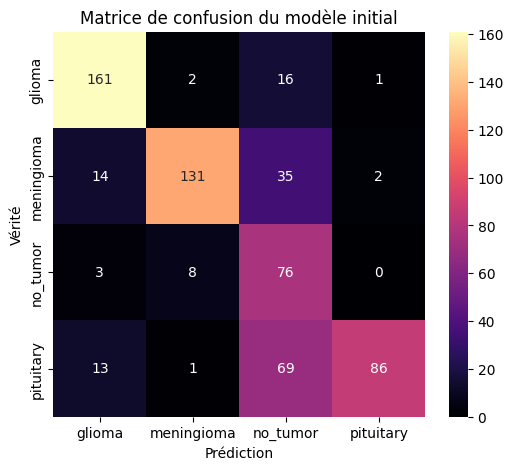

In [3]:
# Évaluation des Prédictions
# Matrice de confusion
labels = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]
cm = confusion_matrix(all_labels, predictions, labels=labels)
print("Matrice de confusion du modèle initial :")
print(cm)

# Rapport de classification
report = classification_report(all_labels, predictions)
print("Rapport de classification du modèle initial :")
print(report)

# Sauvegardez les résultats dans un fichier
with open('logfile.txt', 'w') as f:
    f.write("Matrice de confusion :\n")
    f.write(str(cm))
    f.write("\n\nRapport de classification :\n")
    f.write(report)
    
# Créer une figure et un axe
fig, ax = plt.subplots(figsize=(6,5))

labels_propres = ["glioma", "meningioma", "no_tumor", "pituitary"]
# Créer une heatmap
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap="magma", xticklabels=labels_propres, yticklabels=labels_propres)

# Ajouter des titres et des labels
plt.title('Matrice de confusion du modèle initial')
plt.xlabel('Prédiction')
plt.ylabel('Vérité')

# Afficher la figure
plt.show()

In [4]:
# Chargement du modèle
model = load_model('best_model.h5')

# Chemin des données de test
test_data_path = 'dataset/test'

# Chargement des Données de Test
all_files = []
all_labels = []

for folder in os.listdir(test_data_path):
    if folder != '.DS_Store':
        for file in os.listdir(os.path.join(test_data_path, folder)):
            all_files.append(os.path.join(test_data_path, folder, file))
            all_labels.append(folder)


# Prédictions
predictions = []

# Créer une instance de tqdm pour la barre de progression
progress_bar = tqdm(all_files)

for file in progress_bar:
    # Charger l'image et effectuer la prétraitement si nécessaire
    img = image.load_img(file, target_size=(256, 256))
    # Élargir les dimensions si nécessaire (par exemple, pour un seul échantillon)
    img = np.expand_dims(img, axis=0)
    # Faire la prédiction
    probabilities = model.predict(img, verbose=0)
    # Récupérer l'indice de la classe prédite
    predicted_class_index = np.argmax(probabilities)
    # Ajouter la classe prédite à la liste des prédictions
    predictions.append(predicted_class_index)
    # Mettre à jour la barre de progression
    progress_bar.set_description(f"Processing {file}")

Processing dataset/test/pituitary_tumor/P_629.jpg: 100%|██████████| 618/618 [04:33<00:00,  2.26it/s]            


In [5]:
prediction_propre = []

for i in predictions:
    if i == 0:
        prediction_propre.append('glioma_tumor')
    elif i == 1:
        prediction_propre.append('meningioma_tumor')
    elif i == 2:
        prediction_propre.append('no_tumor')
    elif i == 3:
        prediction_propre.append('pituitary_tumor')    



Rapport de classification du nouveau modèle :
                  precision    recall  f1-score   support

    glioma_tumor       0.91      0.78      0.84       180
meningioma_tumor       0.76      0.82      0.79       182
        no_tumor       0.83      0.92      0.87        87
 pituitary_tumor       0.92      0.92      0.92       169

        accuracy                           0.85       618
       macro avg       0.86      0.86      0.86       618
    weighted avg       0.86      0.85      0.85       618



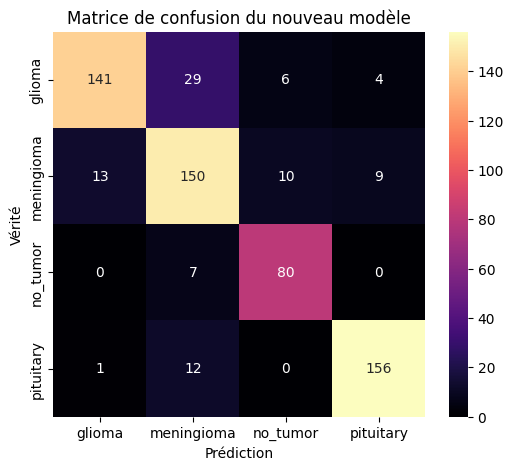

In [6]:
# Évaluation des Prédictions
# Matrice de confusion
labels = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]
cm = confusion_matrix(all_labels, prediction_propre, labels=labels)

# Rapport de classification
report = classification_report(all_labels, prediction_propre)
print("\nRapport de classification du nouveau modèle :")
print(report)

    
# Créer une figure et un axe
fig, ax = plt.subplots(figsize=(6,5))

# Créer une heatmap
labels_propres = ["glioma", "meningioma", "no_tumor", "pituitary"]
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap="magma", xticklabels=labels_propres, yticklabels=labels_propres)

# Ajouter des titres et des labels
plt.title('Matrice de confusion du nouveau modèle')
plt.xlabel('Prédiction')
plt.ylabel('Vérité')

# Afficher la figure
plt.show()

In [7]:
print(cm)

[[141  29   6   4]
 [ 13 150  10   9]
 [  0   7  80   0]
 [  1  12   0 156]]
